#### 일차함수 관계식 찾기


##### 문제 파악

In [23]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


##### 데이터 탐색

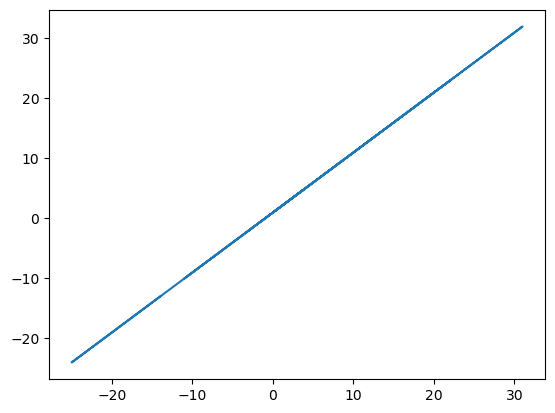

In [24]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

##### 데이터 전처리

In [25]:
import pandas as pd
df = pd.DataFrame({'X':x, 'Y':y})       # 리스트 형식의 데이터를 데이터프레임 형식으로 만든다. 
print(df.shape)     # 10행 2열 구조이다.
df

(10, 2)


,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [26]:
df.head()   # head 메소드는 데이터프레임의 첫 5개의 행(인덱스 0~4)을 추출해서 표시한다. 출력값도 데이터프레임의 자료구조를 갖는다.

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


In [27]:
df.tail()   # tail 메소드는 뒤에서부터 5개의 행을 보여준다.      

,X,Y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


In [28]:
train_features = ['X']
target_cols = ['Y']
# loc() 에 들어가는 변수
# A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).
# A list or array of labels, e.g. ['a', 'b', 'c'].
# A slice object with labels, e.g. 'a':'f'.
X_train = df.loc[:, train_features]
Y_train = df.loc[:, target_cols]
print(X_train.shape, Y_train.shape)

(10, 1) (10, 1)


##### 모델 학습
> ###### 머신러닝 알고리즘을 적용하여 선형회귀 관계식을 찾아본다.

In [29]:
from sklearn.linear_model import LinearRegression   # 사이킷런 패키지의 linear_model 모듈에서 LinearRegression 클래스 함수를 불러온다.
lr = LinearRegression()     # 모델 인스턴스 객체를 생성 후 lr 변수에 저장한다.
lr.fit(X_train, Y_train)    # fit 메소드는 입력 데이터를 모델에 전달하여 학습시키는 함수 명령이다. X, Y로부터 선형 관계식을 찾는다.

LinearRegression()

In [30]:
lr.coef_, lr.intercept_     # 학습된 lr 모델 인스턴스 객체의 coef_ 속성으로부터 X 변수의  회귀계수(기울기)를, 
                            # intercept_ 속성으로부터 상수항(y 절편)을 얻을 수 있다.

(array([[1.]]), array([1.]))

In [31]:
print("기울기:", lr.coef_[0][0])        # 입력 데이터가 2차원 구조이므로 회귀계수도 2차원 구조로 반환된다. 
print("y절편:", lr.intercept_[0])       # X 변수의 회귀계수가 1이고 상수항이 1이므로, lr모델은 Y = X + 1의 관계식을 갖는다.

기울기: 1.0
y절편: 1.0


##### 예측

In [32]:
import numpy as np
X_new = np.array(11).reshape(1, 1)  # [[11]]    / 학습에 사용한 X_train이 2차원 구조이므로, predict 메소드의 입력값 또한 2차원 구조를 가져야 한다.
lr.predict(X_new)                   # / 11 을 array 함수로 1차원 배열로 변환 후 reshape 메소드를 적용하여 (1행, 1열) 형태의 2차원 구조로 변형한다. 

c:\Users\zip23\anaconda3\envs\virtualenv_1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.]])

In [35]:
X_test = np.arange(11, 16, 1).reshape(-1, 1)    # [[11], [12], [13], [14], [15]] /
                                                # arange 함수로 11부터 15까지 1씩 증가하는 1차원 배열을 생성한 후 reshape 메소드로 2차원 배열로 변환한다.
X_test                                          # reshape 메소드의 인수로 -1을 사용하면, 나머지 인수를 기반으로 적절한 배열 구조를 만들어 준다. 
                                                # -1이 5가 되어서 (5행, 1열) 구조로 변환됐다.

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [34]:
Y_pred = lr.predict(X_test)     # predict 메소드는 입력 데이터에 대한 예측값을 반환한다.
Y_pred

c:\Users\zip23\anaconda3\envs\virtualenv_1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])